<a href="https://colab.research.google.com/github/prennah/Assignment2-ISYS2001/blob/main/download_enron_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Enron Email Data



### Full/Complete Dataset

The following code-cell will download the complete Enron email database to the Colab instance.  It will take about 1-2 mins to download.

In [3]:
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2023-05-24 08:02:35--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 52.105.206.39, 2a01:111:f402:f043::39
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|52.105.206.39|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-05-24 08:02:36--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  15.2MB/s    in 59s     

2023-05-24 08:03:35 (13.7 MB/s) - 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [7]:
conn = sqlite3.connect("/content/enron.db")

In [8]:
cur = conn.cursor()

In [9]:
#check schema of database
sql = """
SELECT name
FROM sqlite_master
WHERE type = "table";
"""

cur.execute(sql)
cur.fetchall()

[('employeelist',), ('message',), ('recipientinfo',), ('referenceinfo',)]

In [10]:
#check Schema of table employeelist using PRAGMA
sql = """
PRAGMA table_info("employeelist");
"""

cur.execute(sql)
cur.fetchall()

[(0, 'eid', 'INTEGER', 1, None, 1),
 (1, 'firstName', 'VARCHAR(31)', 1, "''", 0),
 (2, 'lastName', 'VARCHAR(31)', 1, "''", 0),
 (3, 'Email_id', 'VARCHAR(31)', 1, "''", 0),
 (4, 'Email2', 'VARCHAR(31)', 0, None, 0),
 (5, 'Email3', 'VARCHAR(31)', 0, None, 0),
 (6, 'EMail4', 'VARCHAR(31)', 0, None, 0),
 (7, 'folder', 'VARCHAR(31)', 1, "''", 0),
 (8, 'status', 'VARCHAR(50)', 0, None, 0)]

In [11]:
#check Schema of table message using PRAGMA
sql = """
PRAGMA table_info("message");
"""

cur.execute(sql)
cur.fetchall()

[(0, 'mid', 'INTEGER', 1, "'0'", 1),
 (1, 'sender', 'VARCHAR(127)', 1, "''", 0),
 (2, 'date', 'DATETIME', 0, None, 0),
 (3, 'message_id', 'VARCHAR(127)', 0, None, 0),
 (4, 'subject', 'TEXT', 0, None, 0),
 (5, 'body', 'TEXT', 0, None, 0),
 (6, 'folder', 'VARCHAR(127)', 1, "''", 0)]

In [12]:
#check Schema of table recipientinfo using PRAGMA
sql = """
PRAGMA table_info("recipientinfo");
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'rtype', 'TEXT', 0, None, 0),
 (3, 'rvalue', 'VARCHAR(127)', 0, None, 0),
 (4, 'dater', 'DATETIME', 0, None, 0)]

In [13]:
#check Schema of table referenceinfo using PRAGMA
sql = """
PRAGMA table_info("referenceinfo");
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rfid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'reference', 'TEXT', 0, None, 0)]

#**Email Traffic Overtime**

In [14]:
#write sql query
sql = """
SELECT date
FROM message
"""

#convert to dataform
import pandas as pd
message_df = pd.read_sql_query(sql, conn)
message_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252759 entries, 0 to 252758
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    252759 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB


In [15]:
#sql query to count number of emails per day
sql = """
SELECT strftime("%Y-%m-%d", date) AS date,
COUNT(*) AS count 
FROM message
GROUP BY date
"""

#convert in dataframe
messageperday_df = pd.read_sql_query(sql, conn)
messageperday_df

,date,count
0,0001-05-30,2
1,0001-06-18,1
2,0001-07-24,1
3,0001-08-01,1
4,0001-08-06,1
...,...,...
194082,2020-12-29,1
194083,2043-12-28,1
194084,2044-01-02,1
194085,2044-01-04,1


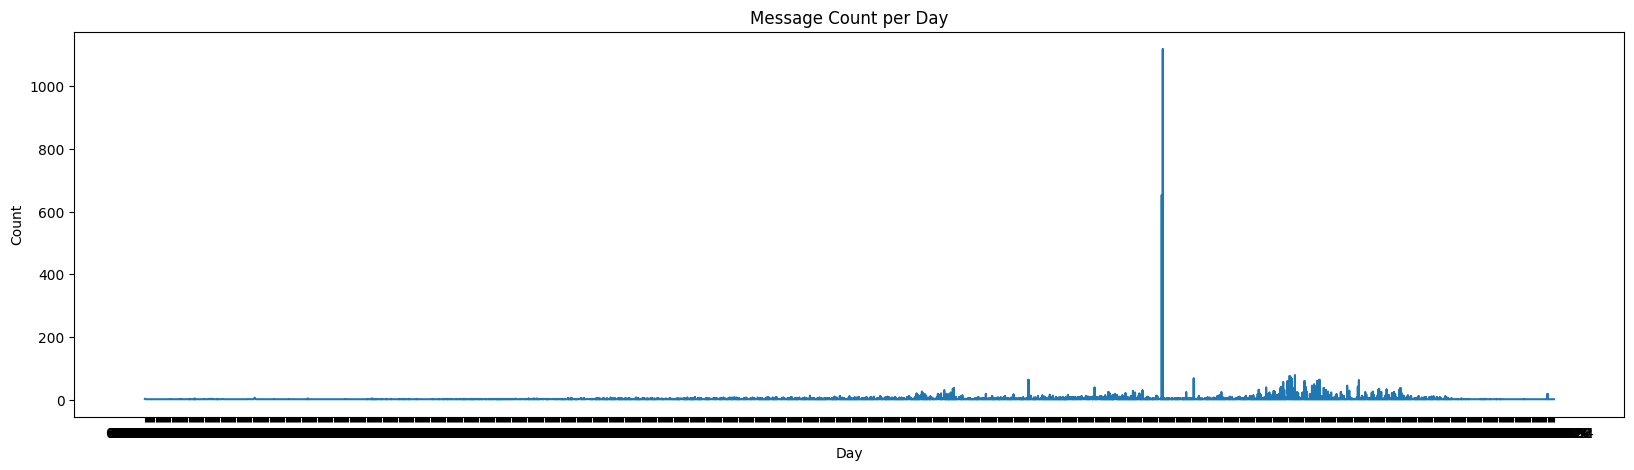

In [16]:
#plot line graph for dataframe

#Assume you have a Dataframe named "messageperday_df" with "date" and "count" columns

#set the labels and title
plt.figure(figsize=(20,5))
plt.plot(messageperday_df["date"], messageperday_df["count"])
plt.xlabel("Day")
plt.ylabel("Count")
plt.title("Message Count per Day")

#Display the plot
plt.show()

##**Analysis of message per day**

As you can see on the graph, the message count per day has exceeded more than 1000 meaning that the enron received more than 1000 emails. there are some days where the message count has flunctuated from 0 to 200 per day.

In [17]:
#sql query to count number of emails per week
sql = """
SELECT strftime("%Y-%m-%w", date) AS date,
COUNT(*) AS count 
FROM message
GROUP BY date
"""

#convert in dataframe
messageperweek_df = pd.read_sql_query(sql, conn)
messageperweek_df

,date,count
0,0001-05-3,2
1,0001-06-1,1
2,0001-07-2,1
3,0001-08-3,1
4,0001-08-1,1
...,...,...
194082,2020-12-2,1
194083,2043-12-1,1
194084,2044-01-6,1
194085,2044-01-1,1


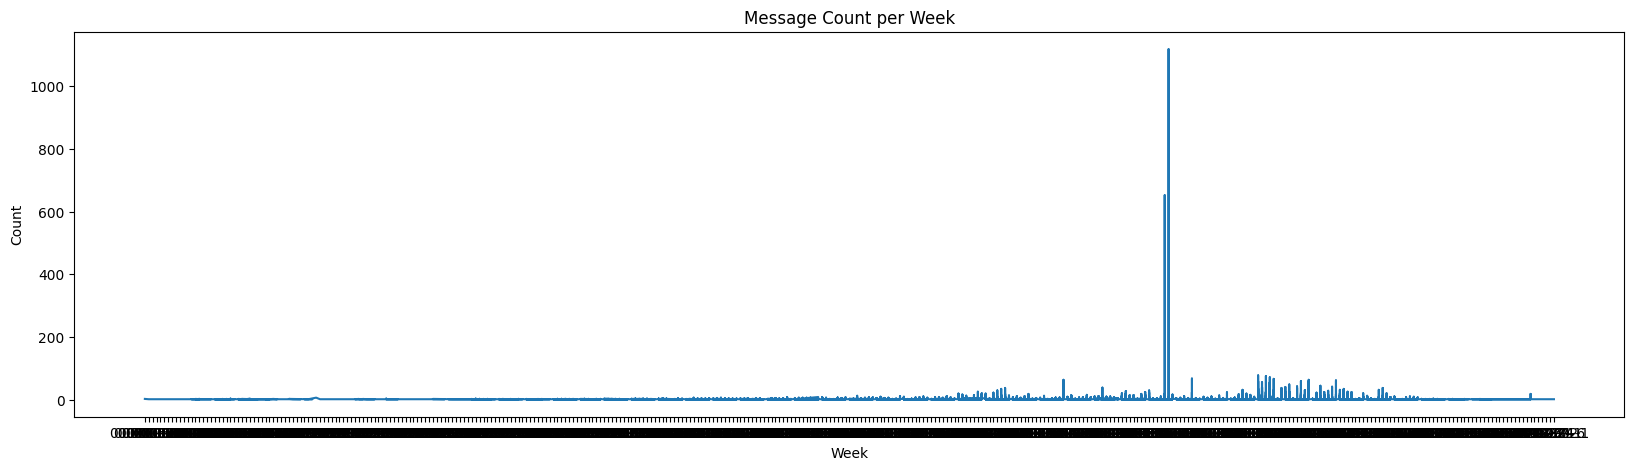

In [18]:
#plot line graph for dataframe


#Assume you have a Dataframe named "messageperweek_df" with "date" and "count" columns

#set the labels and title
plt.figure(figsize=(20,5))
plt.plot(messageperweek_df["date"], messageperweek_df["count"])
plt.xlabel("Week")
plt.ylabel("Count")
plt.title("Message Count per Week")

#Display the plot
plt.show()

##**Analysis of message per week**

The graph here is the same as the above one. Meaning that message count per week has also exceeded 1000. Few weeks prior to where it exceeded 1000, it reached 600 message count per week.

In [19]:
#sql query to count number of emails per month
sql = """
SELECT strftime("%Y-%m-%m", date) AS date,
COUNT(*) AS count 
FROM message
GROUP BY date
"""

#convert in dataframe
messagepermonth_df = pd.read_sql_query(sql, conn)
messagepermonth_df

,date,count
0,0001-05-05,2
1,0001-06-06,1
2,0001-07-07,1
3,0001-08-08,1
4,0001-08-08,1
...,...,...
194082,2020-12-12,1
194083,2043-12-12,1
194084,2044-01-01,1
194085,2044-01-01,1


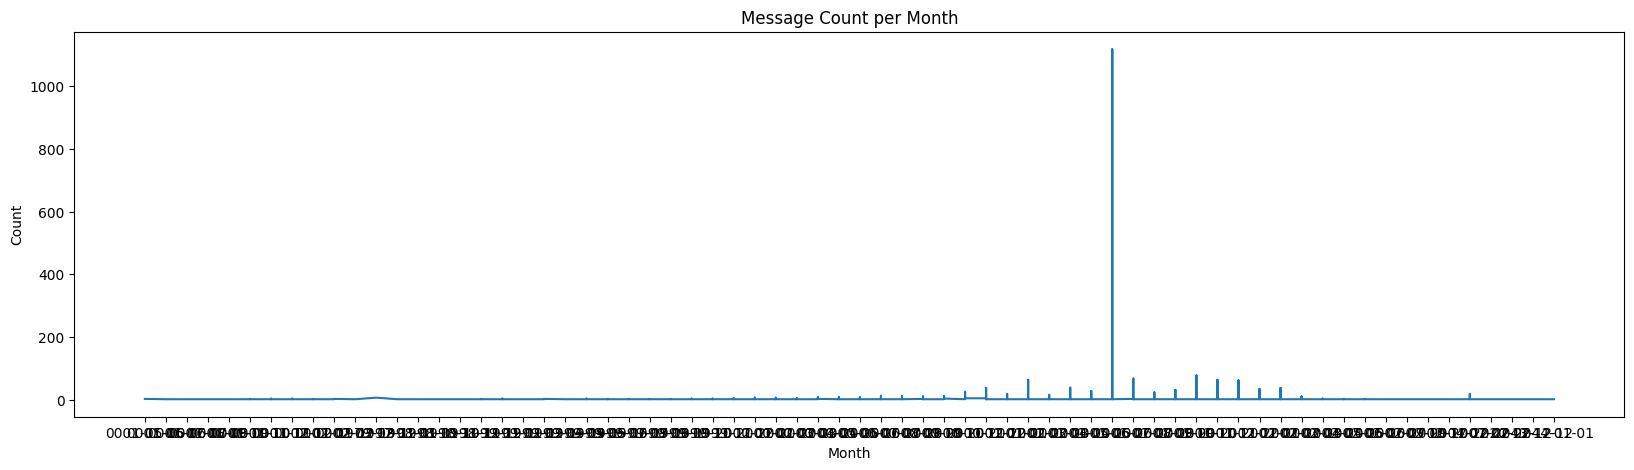

In [20]:
#plot line graph for dataframe


#Assume you have a Dataframe named "messagepermonth_df" with "date" and "count" columns

#set the labels and title
plt.figure(figsize=(20,5))
plt.plot(messagepermonth_df["date"], messagepermonth_df["count"])
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Message Count per Month")

#Display the plot
plt.show()

##**Analysis of message per month**

The graph here shows that the message count is still above 1000. All the graphs shows that they are negatively skewed. 

#**Top Senders and Recipients**

In [31]:
#sql query to count the number of emails sent by each sender
sql_senders = """
SELECT sender, Count(*) AS count
From message
GROUP BY sender
ORDER BY count 
DESC
LIMIT 10
"""



In [33]:
#read data from the database into dataframes
top_senders_df = pd.read_sql_query(sql_senders, conn)
top_senders_df

,sender,count
0,jeff.dasovich@enron.com,6273
1,j.kaminski@enron.com,5838
2,kay.mann@enron.com,5100
3,sara.shackleton@enron.com,4797
4,tana.jones@enron.com,4437
5,chris.germany@enron.com,3686
6,no.address@enron.com,3511
7,enron.announcements@enron.com,2838
8,matthew.lenhart@enron.com,2784
9,debra.perlingiere@enron.com,2549


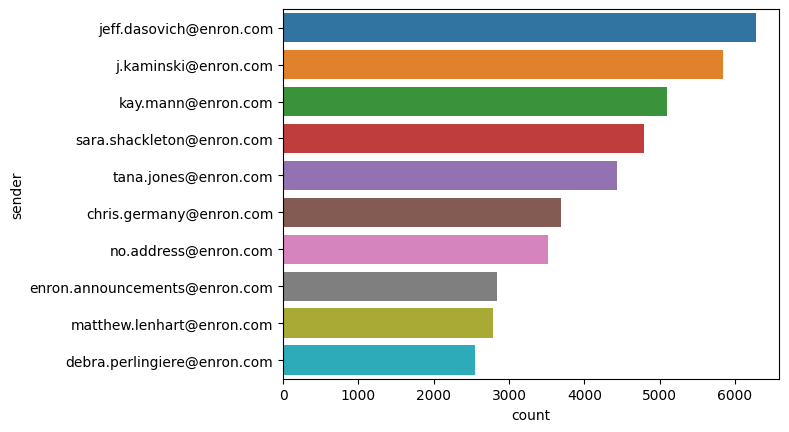

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
data = top_senders_df
sns.barplot(x="count", y = "sender", data=data)
plt.show()

##**Analysis of Top Senders' Barchart**

The barchart shows that jeff.dasovich@enron.com has sent more than 6000 emails in the Enron company. The sender that sent the least number of emails is debra.perlingiere@enron.com and the number varies between 2000 and 3000 respectively.

In [45]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
#sql query to count the number of emails received by each recipient
sql_recipients ="""
SELECT rvalue AS recipient, COUNT(*) AS count
FROM recipientinfo 

GROUP BY recipient 
ORDER BY count DESC
LIMIT 15
"""

In [47]:
conn = sqlite3.connect("enron.db")
#read data from the database into dataframes
top_recipients_df = pd.read_sql_query(sql_recipients, conn)
top_recipients_df

,recipient,count
0,no.address@enron.com,19198
1,jeff.dasovich@enron.com,11137
2,richard.shapiro@enron.com,11015
3,steven.j.kean@enron.com,10873
4,james.d.steffes@enron.com,10615
5,tana.jones@enron.com,9781
6,sara.shackleton@enron.com,9633
7,mark.e.taylor@enron.com,9090
8,louise.kitchen@enron.com,7603
9,pete.davis@enron.com,7509


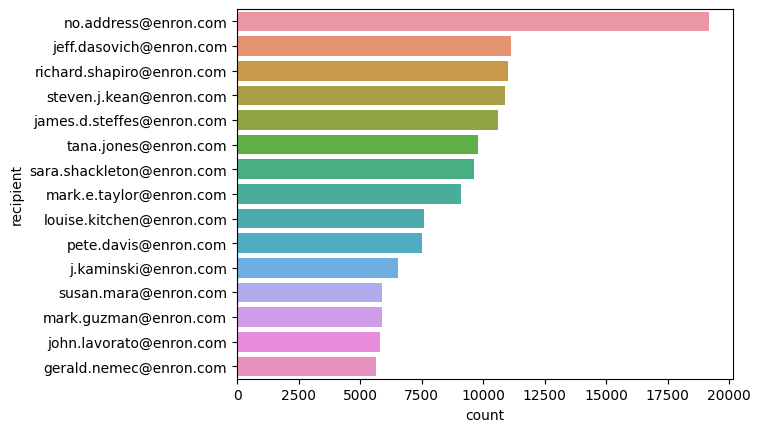

In [48]:
data = top_recipients_df
sns.barplot(x="count", y = "recipient", data=data)
plt.show()

##**Analysis of Top Recipients' Barchart**

The highest in the barchart which is no.address@enron.com has received more than 17500 emails and the number varies between 17500 and 20000. The least number of emails received varies between 5000 and 7500 and was received by gerald.nemec@enron.com.

#**Email Distribution by Recipient Type**



In [57]:
# sql query to retrieve recipient types and their counts
sql_recipient_types = """
SELECT rtype, COUNT(rtype) AS count
FROM recipientinfo
GROUP BY rtype
ORDER BY rtype
"""


In [58]:
#read data from the database into a dataframe
recipient_df = pd.read_sql_query(sql_recipient_types, conn)
recipient_df

,rtype,count
0,BCC,253713
1,CC,253735
2,TO,1556994


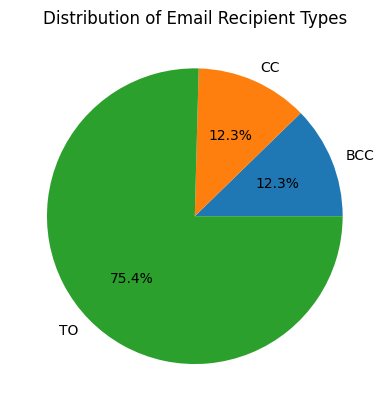

In [60]:
#create a list of labels for the pie chart
labels = recipient_df["rtype"]

#create a list of values for the pie chart
values = recipient_df ["count"]

#plot the pie chart
plt.pie(values, labels=labels, autopct= "%1.1f%%")

plt.title("Distribution of Email Recipient Types")
plt.show()


##**Analysis for Email Distribution Pie Chart**

The pie chart shows that the 75.4% is to which means that the person who received the email normally (TO). The 12.3% shows that people who have received a carbon copy (CC) of the emails and lastly another 12.3% shows that some people have received the emails by a blind carbon copy (BCC).